## Data Understanding

In [ ]:
class_label= {'c0': 'Safe driving',
              'c1': 'Texting - right',
              'c2': 'Talking on the phone - right', 
              'c3': 'Texting - left', 
              'c4': 'Talking on the phone - left', 
              'c5': 'Operating the radio', 
              'c6': 'Drinking', 
              'c7': 'Reaching behind', 
              'c8': 'Hair and makeup', 
              'c9': 'Talking to passenger'}

Text(0.5, 1.0, 'Texting - right')

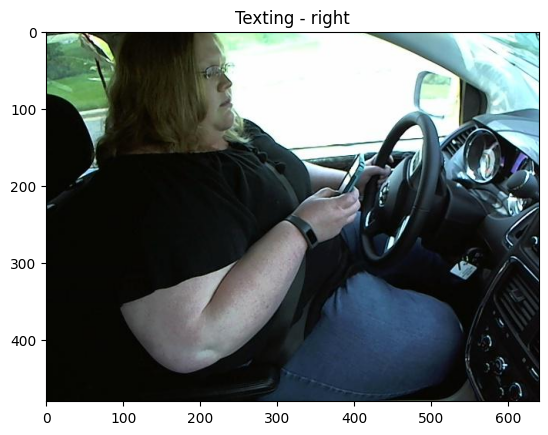

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

random_class=random.choice(os.listdir('imgs/train'))
random_img=random.choice(os.listdir(f'imgs/train/{random_class}'))
random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')
random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
plt.imshow(random_img)       
plt.title(class_label[random_class])

In [ ]:
import splitfolders
mydata = 'imgs/train'
splitfolders.ratio(mydata, output="mydata_2",
    seed=1337, ratio=(.8, .1,.1), group_prefix=None, move=False)

Copying files: 22424 files [00:25, 886.79 files/s] 


In [ ]:
import tensorflow as tf

train_dir='mydata/train'
test_dir='mydata/val'
IMG_SIZE = (480, 460)
#IMG_SIZE=(128,128)
 # define image size
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)
                                                                 #color_mode='grayscale')

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical")
                                                               #color_mode='grayscale') # what type are the labels?


Found 17934 files belonging to 10 classes.
Found 4490 files belonging to 10 classes.


## PAPER MODEL
Adding noise by resizing the images from (480,460) to (128,128)

In [ ]:
#FINAL CNN MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
paper_model=tf.keras.Sequential()
paper_model.add(layers.Conv2D(64,(3,3),padding='same',input_shape=(128,128,3)))
paper_model.add(layers.MaxPooling2D((2, 2)))
paper_model.add(layers.Conv2D(128,(3,3),padding='same'))
paper_model.add(layers.MaxPooling2D((2, 2)))
paper_model.add(layers.Conv2D(256,(3,3),padding='same'))
paper_model.add(layers.Conv2D(512,(3,3),padding='same'))
paper_model.add(layers.MaxPooling2D((2, 2)))
paper_model.add(layers.Flatten())
paper_model.add(layers.Dense(500))
paper_model.add(layers.Dropout(0.2))
paper_model.add(layers.Dense(10,activation='softmax'))


In [ ]:
paper_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 512)      

In [ ]:
paper_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


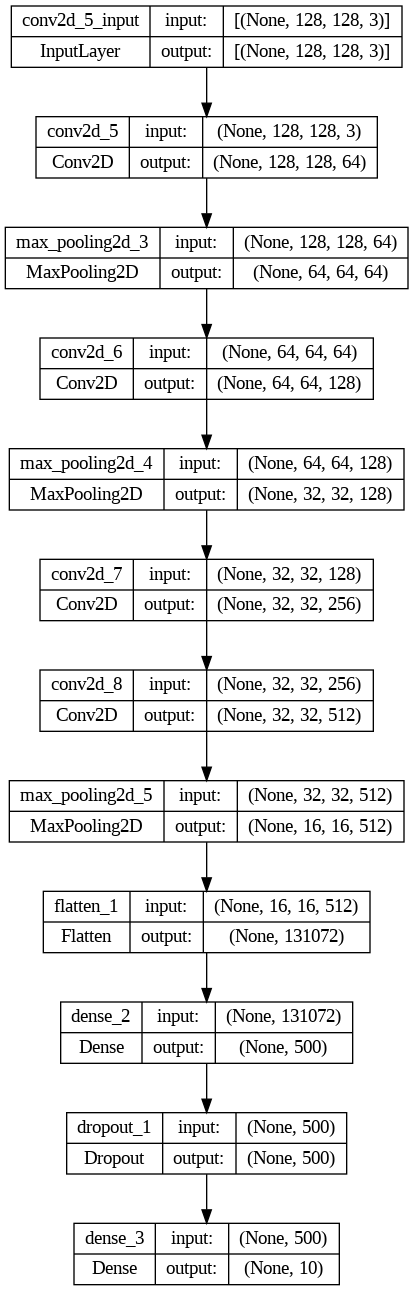

In [ ]:
tf.keras.utils.plot_model(
    paper_model,
    to_file="paper_model.png",
    show_shapes=True)

In [ ]:
paper_model.fit(train_data,epochs=5,
                validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 51s 89ms/step - loss: 616.8599 - accuracy: 0.7722 - val_loss: 5.2548 - val_accuracy: 0.9318
Epoch 2/5
561/561 [==============================] - 50s 88ms/step - loss: 2.2895 - accuracy: 0.9693 - val_loss: 3.1417 - val_accuracy: 0.9621
Epoch 3/5
561/561 [==============================] - 49s 87ms/step - loss: 2.6793 - accuracy: 0.9715 - val_loss: 2.1484 - val_accuracy: 0.9773
Epoch 4/5
561/561 [==============================] - 56s 100ms/step - loss: 2.0082 - accuracy: 0.9780 - val_loss: 1.6596 - val_accuracy: 0.9849
Epoch 5/5
561/561 [==============================] - 57s 100ms/step - loss: 2.4819 - accuracy: 0.9790 - val_loss: 5.7404 - val_accuracy: 0.9673


In [ ]:
paper_model.evaluate(val_data)

141/141 [==============================] - 8s 49ms/step - loss: 5.7404 - accuracy: 0.9673


[5.740401268005371, 0.9672605991363525]

In [ ]:
paper_model.save('paper_model.h5')

## PAPER MODEL + Data augmentation
add data augmentation: convert images to grayscale

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#IMG_SIZE = 128

paper_data_augmentation = keras.Sequential([
  #layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Lambda(tf.image.rgb_to_grayscale),
  layers.Rescaling(1./255),
])

(1, 128, 128, 1)


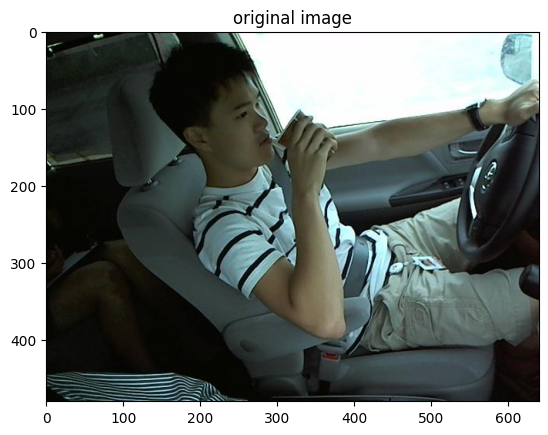

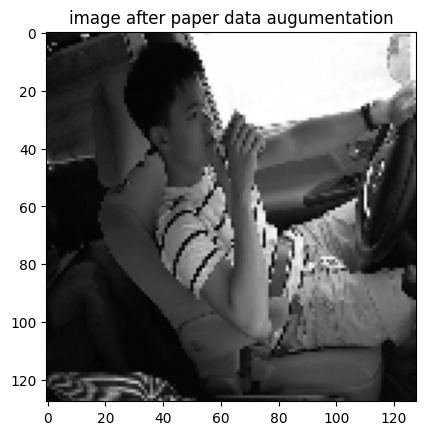

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg


random_class=random.choice(os.listdir('imgs/train'))
random_img=random.choice(os.listdir(f'imgs/train/{random_class}'))
#random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')
#random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
random_img = mpimg.imread(f'imgs/train/{random_class}/{random_img}')
#random_img = mpimg.imread('/content/imgs/test/img_100007.jpg')

plt.title('original image')
plt.imshow(random_img)       
augmented_img = paper_data_augmentation(tf.expand_dims(random_img, axis=0))
print(augmented_img.shape)
plt.figure();
plt.title('image after paper data augumentation')
plt.imshow(tf.squeeze(augmented_img),cmap='gray')

In [ ]:
inputs=tf.keras.Input(shape=(128,128,1))
x=paper_data_augmentation(inputs)
x=layers.Conv2D(64,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(128,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(256,(3,3),padding='same')(x)
x=layers.Conv2D(512,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Flatten()(x)
x=layers.Dense(500)(x)
x=layers.Dropout(0.2)(x)
outputs=layers.Dense(10,activation='softmax')(x)
paper_augmented_model=tf.keras.Model(inputs,outputs)

In [ ]:
paper_augmented_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
paper_augmented_model.fit(train_data,epochs=5,
                          validation_data=val_data)

Epoch 1/5


561/561 [==============================] - ETA: 0s - loss: 2.3247 - accuracy: 0.7770

561/561 [==============================] - 52s 91ms/step - loss: 2.3247 - accuracy: 0.7770 - val_loss: 0.0818 - val_accuracy: 0.9780
Epoch 2/5
561/561 [==============================] - 54s 96ms/step - loss: 0.0792 - accuracy: 0.9766 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 3/5
561/561 [==============================] - 51s 90ms/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.0278 - val_accuracy: 0.9913
Epoch 4/5
561/561 [==============================] - 53s 94ms/step - loss: 0.0971 - accuracy: 0.9718 - val_loss: 0.0601 - val_accuracy: 0.9813
Epoch 5/5
561/561 [==============================] - 51s 90ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0450 - val_accuracy: 0.9884


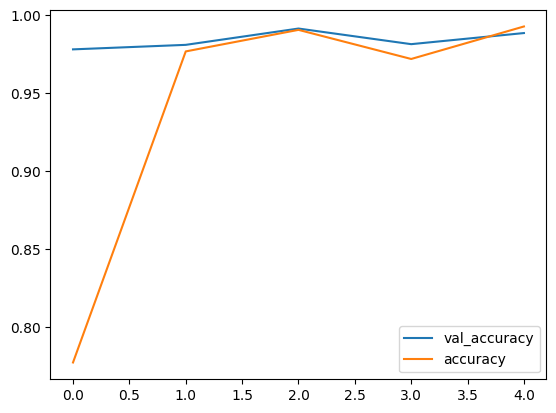

In [ ]:
import matplotlib.pyplot as plt
plt.plot(paper_augmented_model.history.history['val_accuracy'],label='val_accuracy')
plt.plot(paper_augmented_model.history.history['accuracy'],label='accuracy')
plt.legend()

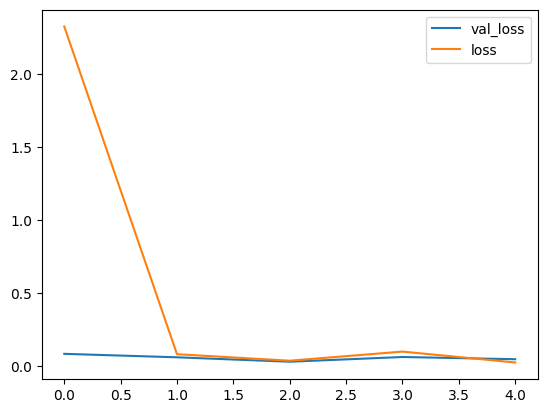

In [ ]:
import matplotlib.pyplot as plt
plt.plot(paper_augmented_model.history.history['val_loss'],label='val_loss')
plt.plot(paper_augmented_model.history.history['loss'],label='loss')
plt.legend()

In [ ]:
import tensorflow as tf
loaded =tf.keras.models.load_model("/content/driver_effecient_net_b0.h5")


In [ ]:
loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 480, 460, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## RESNET MODEL

In [ ]:
resnet_model =  tf.keras.applications.ResNet50V2(include_top=False)


In [ ]:
resnet_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                      

In [ ]:
resnet_model.trainable=False

In [ ]:
inputs=tf.keras.layers.Input(shape=(480,460,3))
x=resnet_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)


In [ ]:
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

In [ ]:
final_resnet_model=tf.keras.Model(inputs,outputs)

In [ ]:
final_resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 480, 460, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
final_resnet_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_resnet = final_resnet_model.fit(train_data,
                                 epochs=5,
                                 validation_data=val_data
                                 )

Epoch 1/5
561/561 [==============================] - 318s 539ms/step - loss: 10.0896 - accuracy: 0.1788 - val_loss: 12.3961 - val_accuracy: 0.1820
Epoch 2/5
561/561 [==============================] - 306s 542ms/step - loss: 4.4099 - accuracy: 0.3352 - val_loss: 4.1964 - val_accuracy: 0.3339
Epoch 3/5
561/561 [==============================] - 306s 541ms/step - loss: 4.0526 - accuracy: 0.4068 - val_loss: 2.7130 - val_accuracy: 0.4802
Epoch 4/5
561/561 [==============================] - 309s 549ms/step - loss: 3.1089 - accuracy: 0.4890 - val_loss: 1.6604 - val_accuracy: 0.5710
Epoch 5/5
561/561 [==============================] - 321s 570ms/step - loss: 2.8463 - accuracy: 0.5389 - val_loss: 2.6294 - val_accuracy: 0.4820


In [ ]:
#it's not working well, so we'll unfreeze some layers (fine tuning)
final_resnet_model.layers

In [ ]:
print(len(final_resnet_model.layers[2].trainable_variables)) 
#the resnet model is not trainable (we set it to False)
for layer in final_resnet_model.layers:
  print(layer.trainable)

0
True
False
True
True


In [ ]:
resnet_model.trainable=True
#we'll unfreeze the last 10 layers
for layer in resnet_model.layers[:-10]:
  layer.trainable = False

In [ ]:
#we have to recompile after fine tuning
final_resnet_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
history_resnet.epoch
#we saw the previous epochs so we'll continue from the last epoch

[0, 1, 2, 3, 4]

In [ ]:
fine_tune_history=final_resnet_model.fit(train_data,
                                         epochs=10,
                                         initial_epoch=history_resnet.epoch[-1],
                                         validation_data=val_data)

Epoch 5/10
561/561 [==============================] - 304s 532ms/step - loss: 2.0673 - accuracy: 0.3277 - val_loss: 1.9796 - val_accuracy: 0.3116
Epoch 6/10
561/561 [==============================] - 301s 534ms/step - loss: 1.4477 - accuracy: 0.5783 - val_loss: 1.2184 - val_accuracy: 0.6514
Epoch 7/10
561/561 [==============================] - 300s 533ms/step - loss: 0.9908 - accuracy: 0.7482 - val_loss: 0.9246 - val_accuracy: 0.7252
Epoch 8/10
561/561 [==============================] - 301s 533ms/step - loss: 0.6510 - accuracy: 0.8592 - val_loss: 0.6183 - val_accuracy: 0.8412
Epoch 9/10
561/561 [==============================] - 299s 531ms/step - loss: 0.4227 - accuracy: 0.9224 - val_loss: 0.3976 - val_accuracy: 0.8993
Epoch 10/10
561/561 [==============================] - 298s 530ms/step - loss: 0.2749 - accuracy: 0.9559 - val_loss: 0.3744 - val_accuracy: 0.8860


In [ ]:
final_resnet_model.save('resnet_model_fine_tuned.h5')

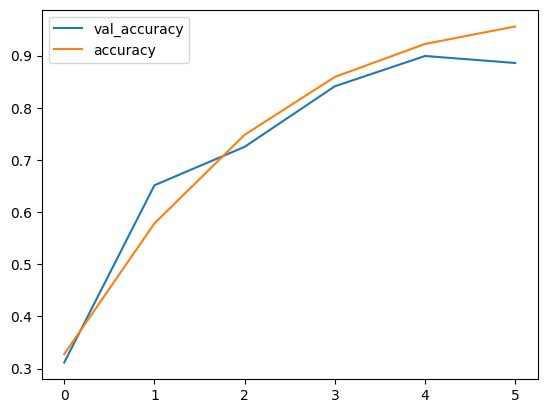

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fine_tune_history.history['val_accuracy'],label='val_accuracy')
plt.plot(fine_tune_history.history['accuracy'],label='accuracy')
plt.legend()

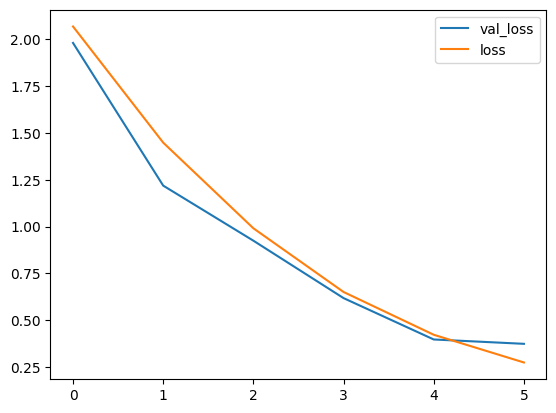

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fine_tune_history.history['val_loss'],label='val_loss')
plt.plot(fine_tune_history.history['loss'],label='loss')
plt.legend()

## DATA AUGUEMNTATION

*RandomFlip* - flips image on horizontal or vertical axis.

RandomRotation - randomly rotates image by a specified amount.


RandomZoom - randomly zooms into an image by specified amount.


RandomHeight - randomly shifts image height by a specified amount.


RandomWidth - randomly shifts image width by a specified amount.


Rescaling - normalizes the image pixel values to be between 0 and 1, this is worth mentioning because it is required for some image models but since we're using the tf.keras.applications implementation of EfficientNetB0, it's not required.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Rescaling(1./255) 
], name ="data_augmentation")

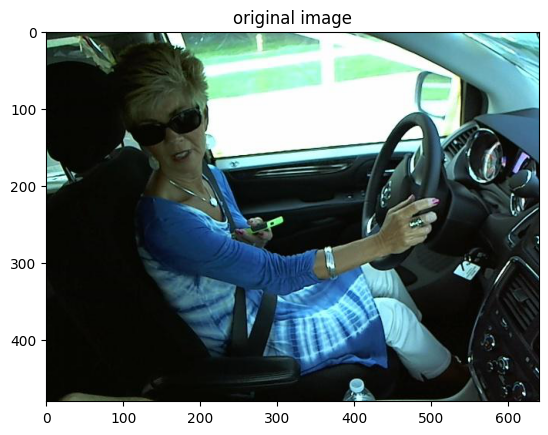

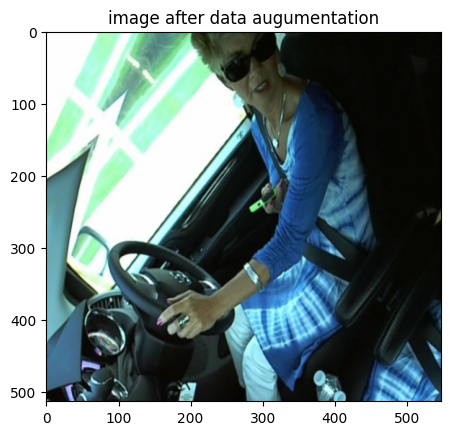

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg


random_class=random.choice(os.listdir('mydata/train'))
random_img=random.choice(os.listdir(f'mydata/train/{random_class}'))
#random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')

#random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
random_img = mpimg.imread(f'mydata/train/{random_class}/{random_img}')
#random_img = mpimg.imread('/content/imgs/test/img_100007.jpg')

plt.title('original image')
plt.imshow(random_img)       
augmented_img = data_augmentation(tf.expand_dims(random_img, axis=0))
plt.figure()
plt.title('image after data augumentation')
plt.imshow(tf.squeeze(augmented_img))

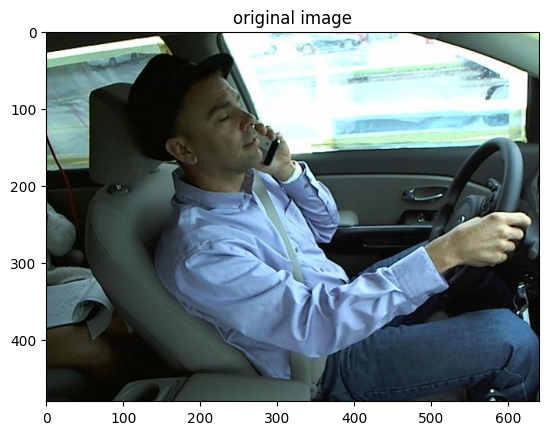

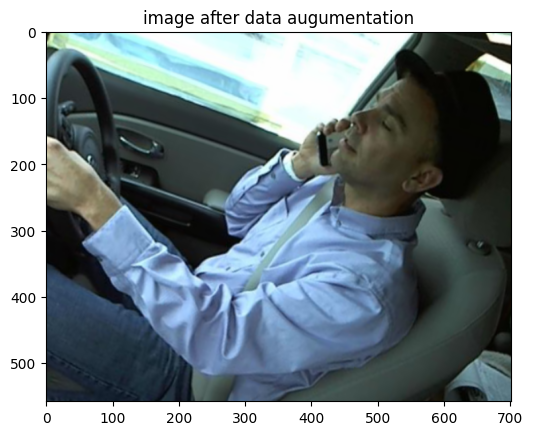

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg


random_class=random.choice(os.listdir('imgs/train'))
random_img=random.choice(os.listdir(f'imgs/train/{random_class}'))
#random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')
#random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
random_img = mpimg.imread(f'imgs/train/{random_class}/{random_img}')
#random_img = mpimg.imread('/content/imgs/test/img_100007.jpg')

plt.title('original image')
plt.imshow(random_img)       
augmented_img = data_augmentation(tf.expand_dims(random_img, axis=0))
plt.figure()
plt.title('image after data augumentation')
plt.imshow(tf.squeeze(augmented_img)/255.)

## RESNET WITH DATA AUGUMENTATION

In [ ]:
resnet_model =  tf.keras.applications.ResNet50V2(include_top=False)
resnet_model.trainable=False

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
inputs=tf.keras.layers.Input(shape=(480,460,3))
x=data_augmentation(inputs)
x=resnet_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

In [ ]:
final_resnet_augumented = keras.Model(inputs, outputs)


In [ ]:
final_resnet_augumented.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
data_augumented_history=final_resnet_augumented.fit(train_data,
                                         epochs=5,
                                         validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 311s 538ms/step - loss: 8.8337 - accuracy: 0.2049 - val_loss: 11.1967 - val_accuracy: 0.2131
Epoch 2/5
561/561 [==============================] - 301s 534ms/step - loss: 4.5831 - accuracy: 0.3447 - val_loss: 3.8755 - val_accuracy: 0.3951
Epoch 3/5
561/561 [==============================] - 302s 535ms/step - loss: 3.6751 - accuracy: 0.4305 - val_loss: 4.0209 - val_accuracy: 0.3334
Epoch 4/5
561/561 [==============================] - 303s 538ms/step - loss: 2.9216 - accuracy: 0.5012 - val_loss: 4.7296 - val_accuracy: 0.3773
Epoch 5/5
561/561 [==============================] - 300s 533ms/step - loss: 2.7635 - accuracy: 0.5361 - val_loss: 2.5247 - val_accuracy: 0.6149


## VGG16 MODEL

In [ ]:
import tensorflow as tf
vgg_model=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=10,
    classifier_activation="softmax",
)

In [ ]:
vgg_model.trainable=False

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
inputs=tf.keras.layers.Input(shape=(480,460,3))
x=vgg_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
final_vgg_model=tf.keras.Model(inputs,outputs)

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 480, 460, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
final_vgg_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

In [ ]:
vgg_history=final_vgg_model.fit(train_data,epochs=5,
                                validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 602s 1s/step - loss: 1.5485 - accuracy: 0.5296 - val_loss: 0.7246 - val_accuracy: 0.8094
Epoch 2/5
561/561 [==============================] - 571s 1s/step - loss: 0.5089 - accuracy: 0.8736 - val_loss: 0.3837 - val_accuracy: 0.9087
Epoch 3/5
561/561 [==============================] - 572s 1s/step - loss: 0.3099 - accuracy: 0.9317 - val_loss: 0.2546 - val_accuracy: 0.9450
Epoch 4/5
561/561 [==============================] - 570s 1s/step - loss: 0.2280 - accuracy: 0.9492 - val_loss: 0.2432 - val_accuracy: 0.9361
Epoch 5/5
561/561 [==============================] - 571s 1s/step - loss: 0.1791 - accuracy: 0.9599 - val_loss: 0.1843 - val_accuracy: 0.9546


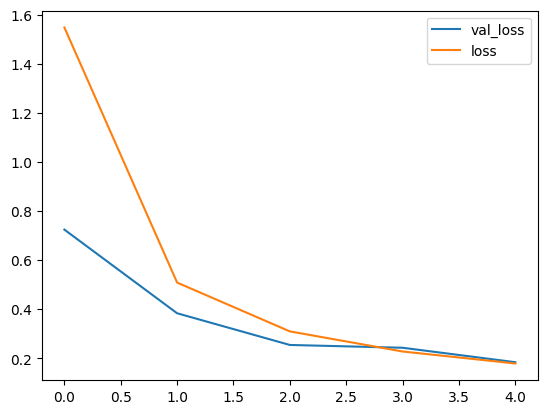

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vgg_history.history['val_loss'],label='val_loss')
plt.plot(vgg_history.history['loss'],label='loss')
plt.legend()

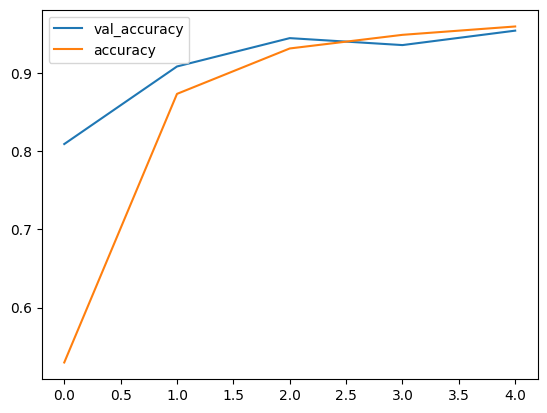

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vgg_history.history['val_accuracy'],label='val_accuracy')
plt.plot(vgg_history.history['accuracy'],label='accuracy')
plt.legend()

In [ ]:
final_vgg_model.save('vgg_model.h5')

## EFFECIENTNETB0 WITHOUT DATA AUGUMENTATION

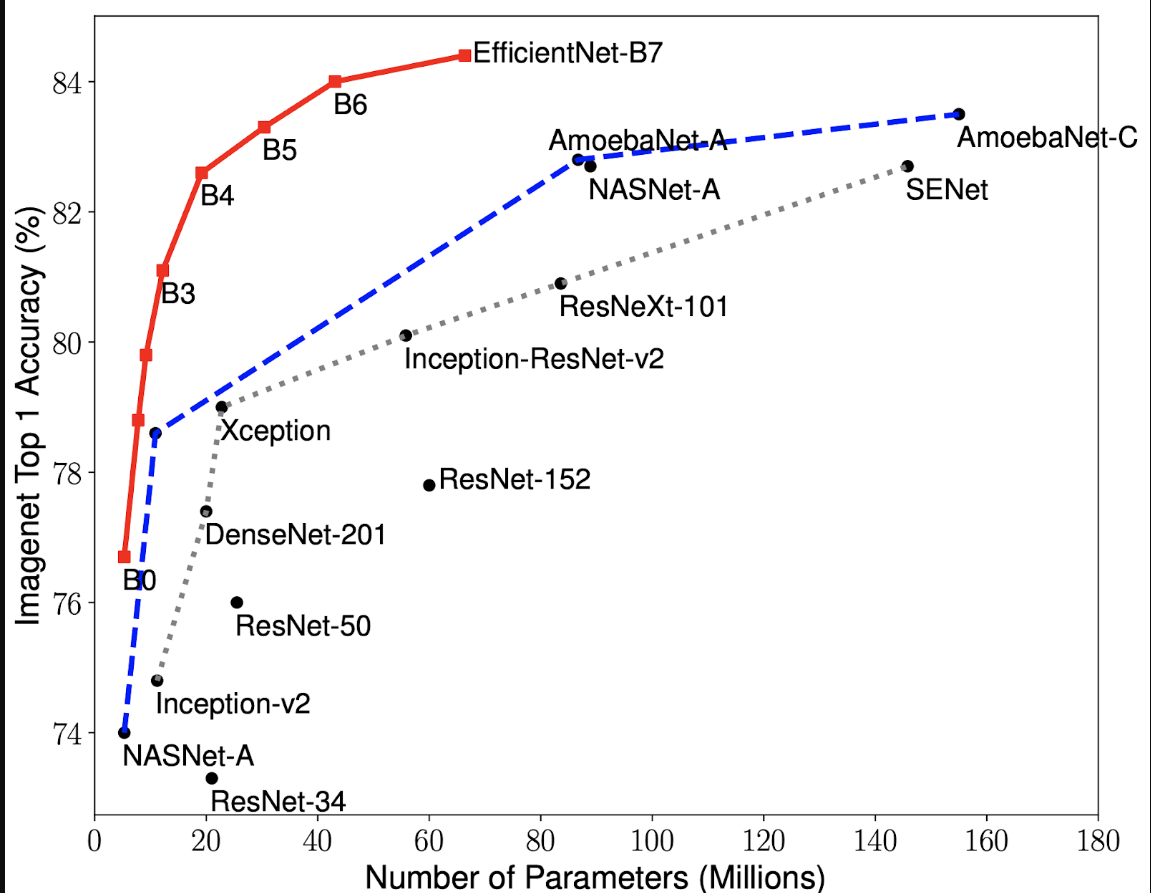

In [ ]:
model = tf.keras.applications.EfficientNetB0(include_top=False)


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model.trainable=False

In [ ]:
model.trainable

False

In [ ]:
inputs = tf.keras.layers.Input(shape=(480, 460, 3), name="input_layer")


In [ ]:
x = model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)



In [ ]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)


In [ ]:
final_model=tf.keras.Model(inputs,outputs)

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 480, 460, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
final_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
history_10_percent = final_model.fit(train_data,
                                 epochs=5,
                                 validation_data=val_data
                                 )

Epoch 1/5
561/561 [==============================] - 239s 394ms/step - loss: 1.3989 - accuracy: 0.6848 - val_loss: 0.8179 - val_accuracy: 0.8969
Epoch 2/5
561/561 [==============================] - 219s 389ms/step - loss: 0.6840 - accuracy: 0.8941 - val_loss: 0.4931 - val_accuracy: 0.9292
Epoch 3/5
561/561 [==============================] - 221s 393ms/step - loss: 0.4621 - accuracy: 0.9266 - val_loss: 0.3500 - val_accuracy: 0.9439
Epoch 4/5
561/561 [==============================] - 220s 392ms/step - loss: 0.3551 - accuracy: 0.9399 - val_loss: 0.2726 - val_accuracy: 0.9563
Epoch 5/5
561/561 [==============================] - 219s 390ms/step - loss: 0.2876 - accuracy: 0.9497 - val_loss: 0.2237 - val_accuracy: 0.9624


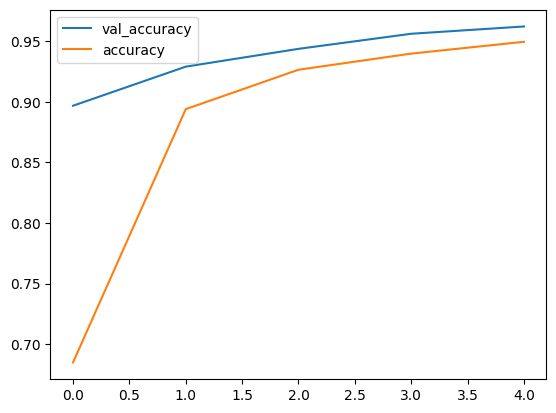

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_10_percent.history['val_accuracy'],label='val_accuracy')
plt.plot(history_10_percent.history['accuracy'],label='accuracy')
plt.legend()

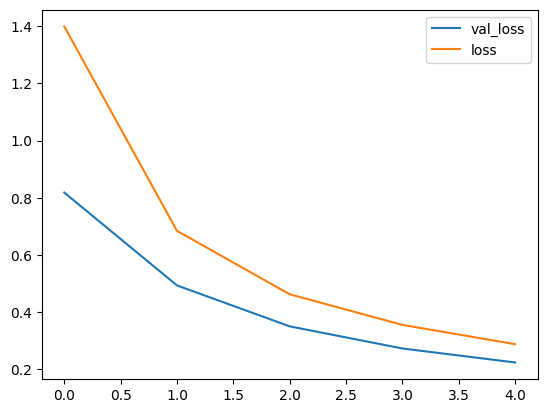

In [ ]:
plt.plot(history_10_percent.history['val_loss'],label='val_loss')
plt.plot(history_10_percent.history['loss'],label='loss')
plt.legend()

In [ ]:
final_model.evaluate(val_data)

141/141 [==============================] - 41s 275ms/step - loss: 0.2238 - accuracy: 0.9633


[0.22376936674118042, 0.9632516503334045]

In [ ]:
final_model

In [ ]:
final_model.save('driver_effecient_net_b0.h5')

In [ ]:
import tensorflow as tf
loaded =tf.keras.models.load_model(("driver_effecient_net_b0.h5"))


In [ ]:
loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 480, 460, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## CUSTOM MODEL

###2 Layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#we'll create a model with 3 convolution layers 
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(480, 460, 3)))
model.add(layers.MaxPooling2D(2,2))

#layer 2 
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 480, 460, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 240, 230, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 230, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 120, 115, 128)    0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1766400)           0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
history=model.fit(train_data,epochs=5,
                  batch_size=128,
                  validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 227s 380ms/step - loss: 79.8844 - accuracy: 0.8555 - val_loss: 0.0882 - val_accuracy: 0.9746
Epoch 2/5
561/561 [==============================] - 210s 373ms/step - loss: 0.0409 - accuracy: 0.9896 - val_loss: 0.1188 - val_accuracy: 0.9744
Epoch 3/5
561/561 [==============================] - 209s 371ms/step - loss: 0.0359 - accuracy: 0.9914 - val_loss: 0.1571 - val_accuracy: 0.9630
Epoch 4/5
561/561 [==============================] - 209s 372ms/step - loss: 0.0265 - accuracy: 0.9944 - val_loss: 0.1018 - val_accuracy: 0.9715
Epoch 5/5
561/561 [==============================] - 224s 397ms/step - loss: 0.0266 - accuracy: 0.9944 - val_loss: 0.1002 - val_accuracy: 0.9829


In [ ]:
model.save('custom_model_2_layers.h5')

In [ ]:
model.evaluate(val_data)

141/141 [==============================] - 28s 191ms/step - loss: 0.1002 - accuracy: 0.9829


[0.100211501121521, 0.9828507900238037]

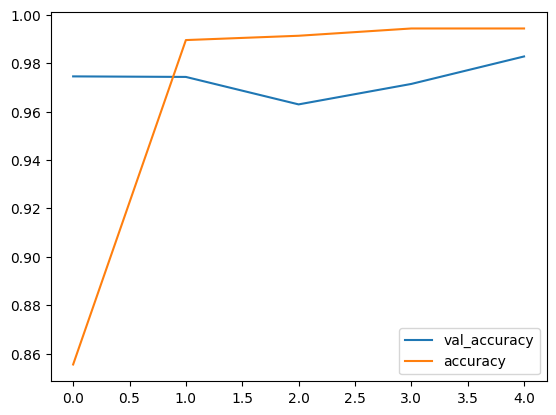

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()

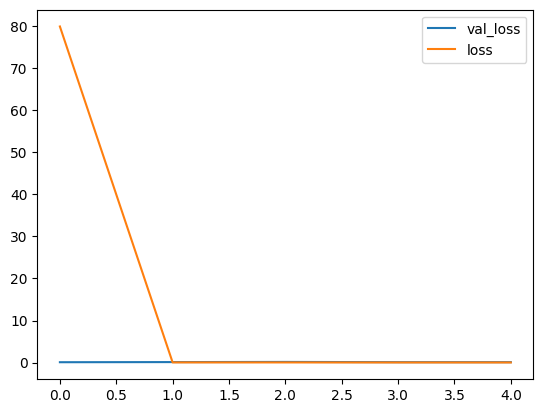

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()

### 3 Layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#we'll create a model with 3 convolution layers 
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(480, 460, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 480, 460, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 240, 230, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 240, 230, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 120, 115, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 115, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 57, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=5,
                  batch_size=128,
                  validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 202s 348ms/step - loss: 7.4207 - accuracy: 0.8784 - val_loss: 0.0849 - val_accuracy: 0.9737
Epoch 2/5
561/561 [==============================] - 201s 356ms/step - loss: 0.0497 - accuracy: 0.9864 - val_loss: 0.0622 - val_accuracy: 0.9829
Epoch 3/5
561/561 [==============================] - 192s 341ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0823 - val_accuracy: 0.9849
Epoch 4/5
561/561 [==============================] - 201s 356ms/step - loss: 0.0678 - accuracy: 0.9816 - val_loss: 0.3669 - val_accuracy: 0.9298
Epoch 5/5
561/561 [==============================] - 203s 359ms/step - loss: 0.0677 - accuracy: 0.9837 - val_loss: 0.0794 - val_accuracy: 0.9782


In [ ]:
model.save('custom_model.h5')

In [ ]:
model.evaluate(val_data)

141/141 [==============================] - 26s 163ms/step - loss: 0.0794 - accuracy: 0.9782


[0.07935508340597153, 0.9781737327575684]

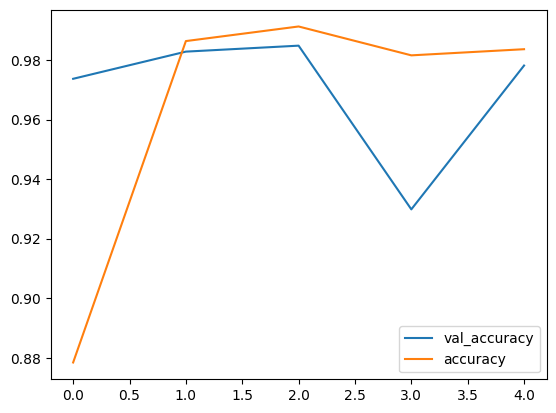

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()

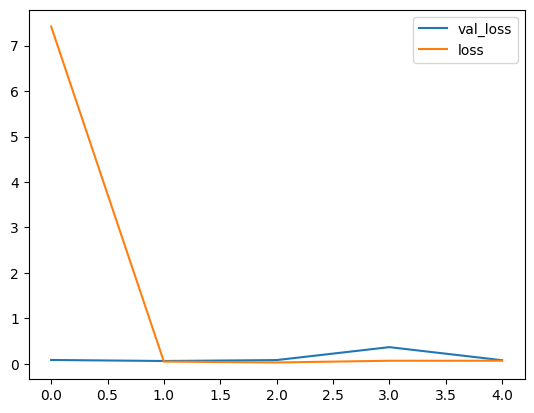

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()

### 4 Layers

In [ ]:
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(480, 460, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 480, 460, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 240, 230, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 240, 230, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 115, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 115, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 57, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=5,
                  batch_size=128,
                  validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 206s 360ms/step - loss: 2.8517 - accuracy: 0.8240 - val_loss: 0.1066 - val_accuracy: 0.9693
Epoch 2/5
561/561 [==============================] - 201s 356ms/step - loss: 0.0751 - accuracy: 0.9784 - val_loss: 0.1024 - val_accuracy: 0.9686
Epoch 3/5
561/561 [==============================] - 202s 358ms/step - loss: 0.0440 - accuracy: 0.9851 - val_loss: 0.0590 - val_accuracy: 0.9844
Epoch 4/5
561/561 [==============================] - 199s 354ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.2015 - val_accuracy: 0.9621
Epoch 5/5
561/561 [==============================] - 201s 356ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.1032 - val_accuracy: 0.9775


In [ ]:
model.evaluate(val_data)

141/141 [==============================] - 33s 215ms/step - loss: 0.1032 - accuracy: 0.9775


[0.1031665951013565, 0.9775055646896362]

In [ ]:
model.save('custom_model_4_layers.h5')

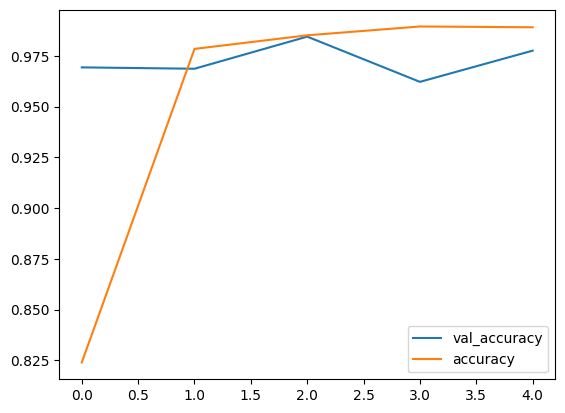

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()

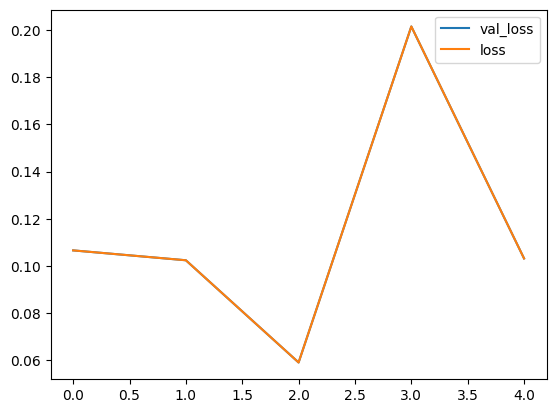

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_loss'],label='loss')
plt.legend()

## Model Comparaison

In [ ]:
accuracies={
    'vgg_16': 0.9546 ,'effecientnet_b0':0.9633  ,'resnet50v2':  0.8860 ,'paper_CNN': 0.9673 ,'paper_CNN_optimized':0.9884,'custom_CNN':0.9782   
    }

times={
        'vgg_16': '0.9546s' ,'effecientnet_b0':'2.47s'  ,'resnet50v2':  '1.59s' ,'paper_CNN': '33s' ,'paper_CNN_optimized':'12s','custom_CNN':'0.26s'

}
losses={
        'vgg_16': 0.18 ,'effecientnet_b0':0.22 ,'resnet50v2':  0.37 ,'paper_CNN': 5.7 ,'paper_CNN_optimized':0.04,'custom_CNN':0.07

}

In [ ]:
results['accuracy(val_data)']=accuracies
results['time to predict']=times
results['Losses']=losses

In [ ]:
results

accuracy(val_data) time to predict  Losses
vgg_16                           0.9546         0.9546s    0.18
effecientnet_b0                  0.9633           2.47s    0.22
resnet50v2                       0.8860           1.59s    0.37
paper_CNN                        0.9673             33s    5.70
paper_CNN_optimized              0.9884             12s    0.04
custom_CNN                       0.9782           0.26s    0.07

<BarContainer object of 6 artists>

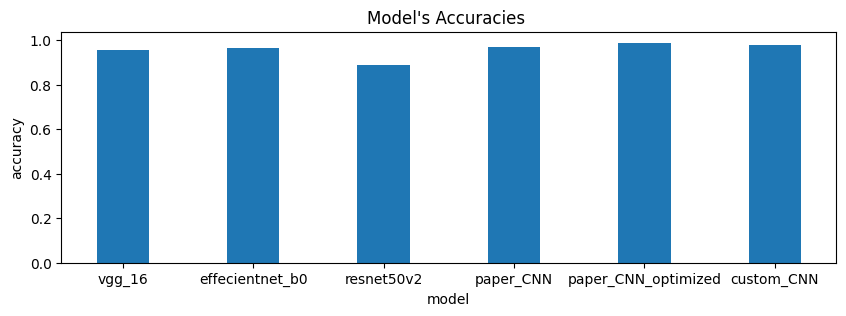

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title("Model's Accuracies ")
plt.bar(results.index,results['accuracy(val_data)'],width=0.4)


<BarContainer object of 6 artists>

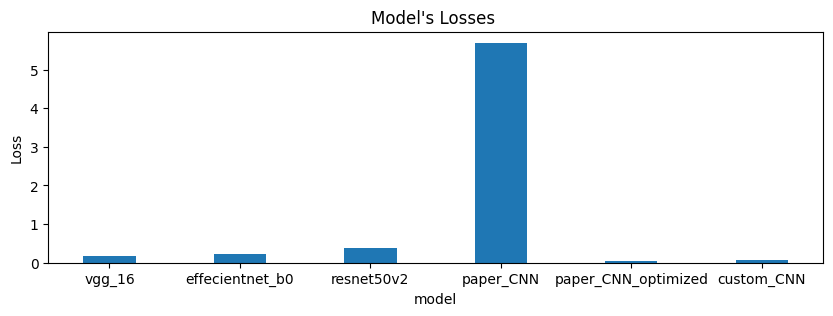

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.xlabel('model')
plt.ylabel('Loss')
plt.title("Model's Losses ")
plt.bar(results.index,results['Losses'],width=0.4)

<BarContainer object of 6 artists>

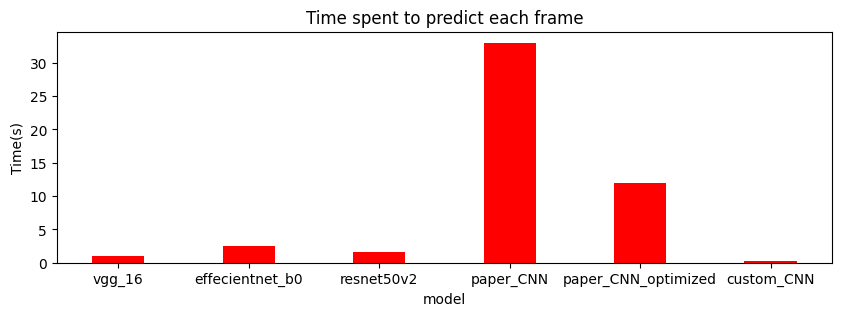

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.xlabel('model')
plt.ylabel('Time(s)')
plt.title('Time spent to predict each frame')
y=[float(x[:-1]) for x in results['time to predict'] ]
plt.bar(results.index,y,width=0.4,color='red')


In [ ]:
colors=[model for model in results.index]
colors


['vgg_16',
 'effecientnet_b0',
 'resnet50v2',
 'paper_CNN',
 'paper_CNN_optimized',
 'custom_CNN']

In [ ]:
results['color']=colors
results

accuracy(val_data) time to predict                color
vgg_16                           0.9546         0.9546s               vgg_16
effecientnet_b0                  0.9633           2.47s      effecientnet_b0
resnet50v2                       0.8860           1.59s           resnet50v2
paper_CNN                        0.9673             33s            paper_CNN
paper_CNN_optimized              0.9884             12s  paper_CNN_optimized
custom_CNN                       0.9782           0.26s           custom_CNN

In [ ]:
colors=['red','blue','green','yellow','pink',"black"]

Text(0.5, 1.0, 'Speed-Accuracy Trade-off')

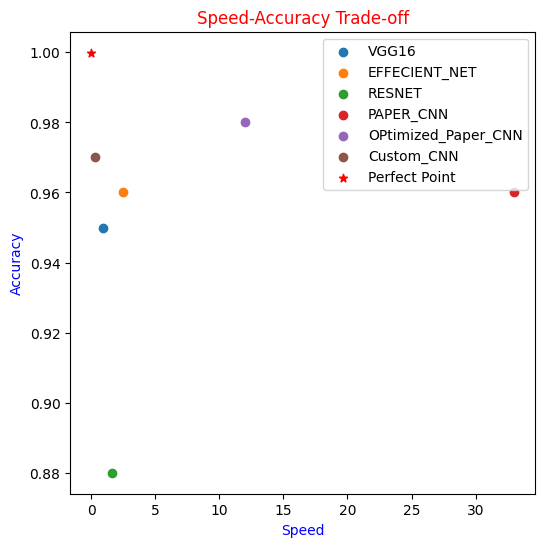

In [ ]:
import numpy as np
plt.figure(figsize=(6,6))
plt.xlabel('Speed',color='blue')
plt.ylabel('Accuracy',color='blue')
plt.scatter(x=0.95,y=0.95, label='VGG16')
plt.scatter(x=2.47,y=0.96, label='EFFECIENT_NET')
plt.scatter(x=1.59,y=0.88, label='RESNET')
plt.scatter(x=33,y=0.96, label='PAPER_CNN')
plt.scatter(x=12,y=0.98, label='OPtimized_Paper_CNN')
plt.scatter(x=0.26,y=0.97, label='Custom_CNN')
plt.scatter(x=0.001,y=0.9999, label='Perfect Point',color='red',marker='*')




plt.legend()
plt.title('Speed-Accuracy Trade-off',color='red')


## 3 layers + Gussian Blur

In [ ]:
!pip install imgaug


In [ ]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    		iaa.GaussianBlur(sigma=(0, 3.0))])


(480, 640, 3)


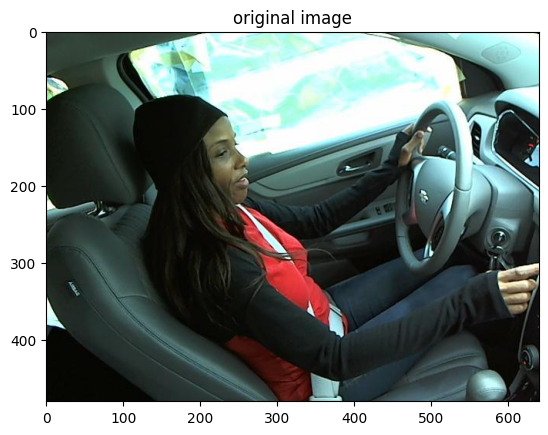

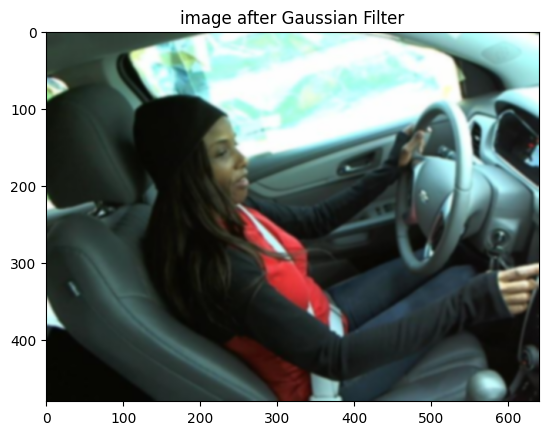

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg


random_class=random.choice(os.listdir('imgs/train'))
random_img=random.choice(os.listdir(f'imgs/train/{random_class}'))
#random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')
#random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
random_img = mpimg.imread(f'imgs/train/{random_class}/{random_img}')
#random_img = mpimg.imread('/content/imgs/test/img_100007.jpg')

plt.title('original image')
plt.imshow(random_img)       
augmented_img = cv2.GaussianBlur(random_img, (9, 9), 0)


print(augmented_img.shape)
plt.figure();
plt.title('image after Gaussian Filter')
plt.imshow(tf.squeeze(augmented_img),cmap='gray')

In [ ]:
!pip install tensorflow_addons

In [ ]:
import tensorflow_addons as tfa


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#IMG_SIZE = 128
def custom_gaussian(img):
  return tfa.image.gaussian_filter2d(img,(9,9))
new_data_augmentation = keras.Sequential([
  #layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Lambda(custom_gaussian),
  layers.Rescaling(1./255),
])

(1, 480, 640, 3)


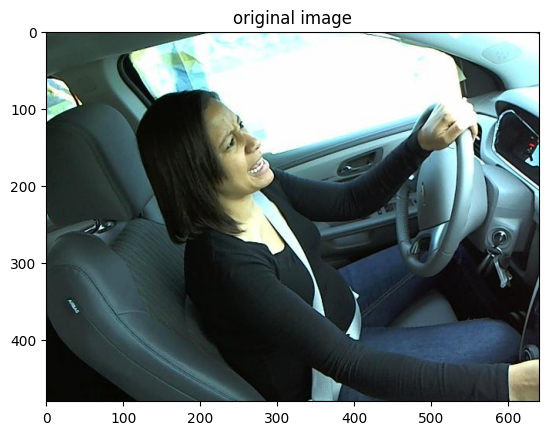

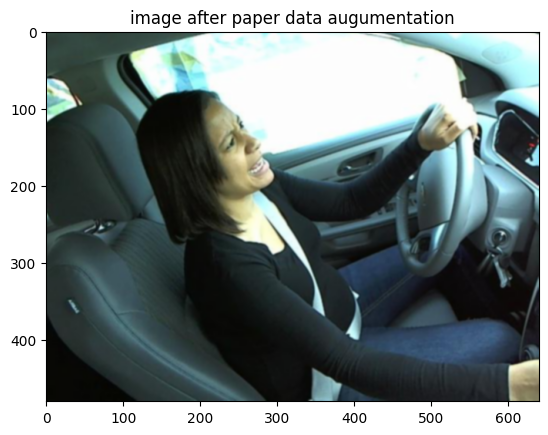

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg


random_class=random.choice(os.listdir('imgs/train'))
random_img=random.choice(os.listdir(f'imgs/train/{random_class}'))
#random_img=cv2.imread(f'imgs/train/{random_class}/{random_img}')
#random_img=cv2.cvtColor(random_img,cv2.COLOR_BGR2RGB)
random_img = mpimg.imread(f'imgs/train/{random_class}/{random_img}')
#random_img = mpimg.imread('/content/imgs/test/img_100007.jpg')

plt.title('original image')
plt.imshow(random_img)       
augmented_img = new_data_augmentation(tf.expand_dims(random_img, axis=0))
print(augmented_img.shape)
plt.figure();
plt.title('image after paper data augumentation')
plt.imshow(tf.squeeze(augmented_img),cmap='gray')

In [ ]:
inputs=tf.keras.Input(shape=(480,460,3))
x=new_data_augmentation(inputs)
x=layers.Conv2D(64,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(128,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(256,(3,3),padding='same')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='softmax')(x)
new_augmented_model=tf.keras.Model(inputs,outputs)

In [ ]:
new_augmented_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 480, 460, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, None, None, 3)     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 480, 460, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 240, 230, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 240, 230, 128)     73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 120, 115, 128)    0         
 g2D)                                                      

In [ ]:
new_augmented_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
new_augmented_model.fit(train_data,epochs=5,
                          validation_data=val_data)

Epoch 1/5
561/561 [==============================] - 319s 558ms/step - loss: 1.3788 - accuracy: 0.8337 - val_loss: 0.0507 - val_accuracy: 0.9864
Epoch 2/5
561/561 [==============================] - 309s 549ms/step - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.0243 - val_accuracy: 0.9922
Epoch 3/5
561/561 [==============================] - 307s 546ms/step - loss: 0.0342 - accuracy: 0.9909 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 4/5
561/561 [==============================] - 308s 548ms/step - loss: 0.1522 - accuracy: 0.9643 - val_loss: 0.0976 - val_accuracy: 0.9802
Epoch 5/5
561/561 [==============================] - 310s 551ms/step - loss: 0.0227 - accuracy: 0.9942 - val_loss: 0.0188 - val_accuracy: 0.9947


In [ ]:
new_augmented_model.evaluate(val_data)

141/141 [==============================] - 40s 261ms/step - loss: 0.0188 - accuracy: 0.9947


[0.018789244815707207, 0.9946547746658325]

In [ ]:
new_augmented_model.save('new_aug_model.h5')